# Using Neural Networks for Image Recognition

For this portfolio, we will make use of the Logo Images Dataset obtained from https://github.com/msn199959/Logo-2k-plus-Dataset, it contains over 150, 000 images, which are categorised as follows:


| Root Category | Logos | Images |
| --- | --- | --- |
| Food |	769 | 54,507 |
| Clothes |	286 | 20,413 |
| Institution |	238	| 17,103 |
| Accessories |	210 | 14,569 |
| Transportation |	203 | 14,719 |
| Electronic |	191	| 13,972 |
| Necessities |	182 | 13,205 |
| Cosmetic | 115 | 7,929 |
| Leisure |	99 | 7,338 |
| Medical |	48 | 3,385 |
| Total |	2,341 |	167,140 |

## Introduction

A neural network attempts to replicate the structure of the brain, in which neurons pass electrical current form a directed network. Here if enough neurons sense an the input (for example a touch on the skin), a signal is sent via a charge through the network to produce an output.

An artificial neural network imitates this by having an input layer, hidden layers and an output layer as shown below:

\textbf{REVISIT!!!}

As we can see, the internal neurons can have multiple inputs and outputs. The inputs, $x_1, ... ,x_n$, have weights $w_1, ... , w_n$ and this weighted input is passed to an activation function $\phi()$, to get the output of the neuron as:
$$
y = \phi \left( \sum_i x_i w_i \right)
$$

A simple neural network is made up of an input layer, hidden layers and an output layers. Our aim is to select correct weights on each edge using iterative methods.

## Backpropogation

This is a training method, also referred to "the backward propogation of errors". To use this, we first define the following quatities

\begin{align}
    J(y) &= (t-y)^2 \text{ the loss function,} \\
    D_n(y) &= \frac{d J(y)}{dw_n} \text{ the derivative of the loss function }
\end{align}

We then perform the following steps for each $(x,t) \in X$
1. Pass $x$ through the neural network and obtain the output $y$
2. Obtain the new weight for each edge $w_n' = \delta w_n = -RD_n(y)$ for a learning rate $R$

## The Pet Breed Dataset


In [1]:
import pathlib

data_dir = pathlib.Path("Pet_Breeds")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3712


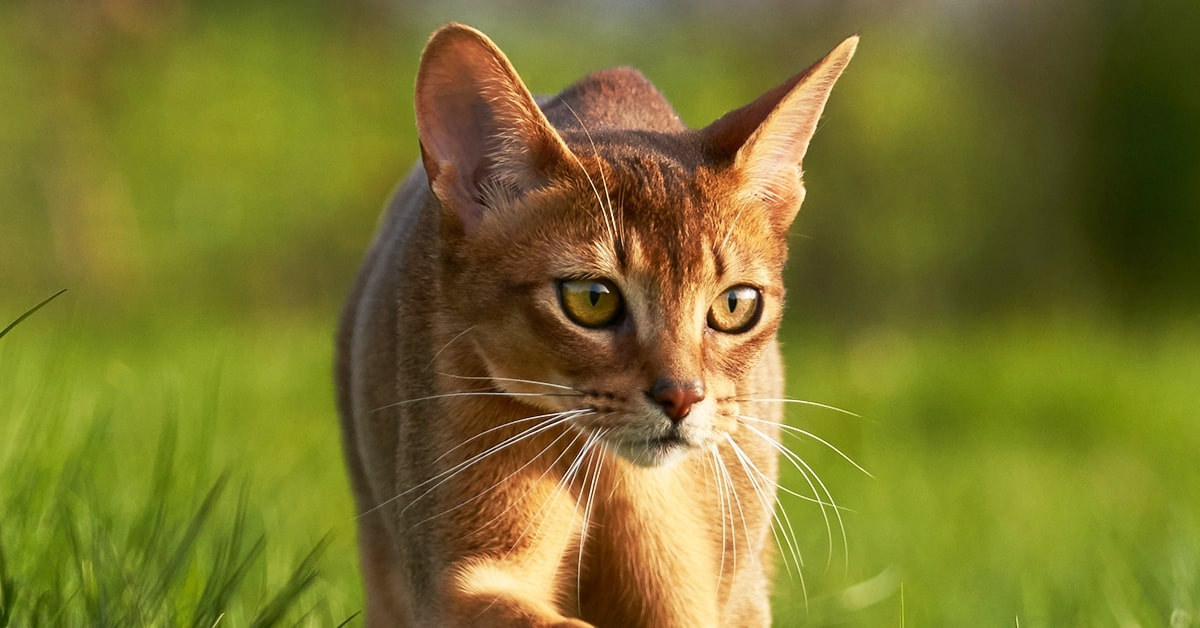

In [2]:
import PIL
import PIL.Image

abyssinian = list(data_dir.glob('abyssinian/*'))
PIL.Image.open(str(abyssinian[50]))

In [3]:
TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 32
img_height = 180
img_width = 180


2023-04-17 16:33:00.689048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 16:33:00.793140: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-17 16:33:00.795296: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-17 16:33:00.795310: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset= "training",
      seed=123,
      image_size= (img_height, img_width),
      batch_size= batch_size
  )


Found 3881 files belonging to 23 classes.
Using 3105 files for training.


2023-04-17 16:33:02.382306: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-17 16:33:02.382334: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IT085374): /proc/driver/nvidia/version does not exist
2023-04-17 16:33:02.383402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:


train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split=0.2,
      subset="both",
      seed=123,
      image_size= (img_height, img_width),
      batch_size= batch_size
  )

Found 3881 files belonging to 23 classes.
Using 3105 files for training.
Using 776 files for validation.


In [24]:
tf.config.list_physical_devices('GPU')

[]

In [19]:
class_names = train_dataset.class_names
print(class_names)

['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund', 'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat', 'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']


In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]

<Figure size 1000x1000 with 0 Axes>

### Data Processing

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10
98/98 [==============================] - 14s 141ms/step - loss: 3.1339 - accuracy: 0.0553 - val_loss: 3.0727 - val_accuracy: 0.0825
